# Fashion-mnsit

##### Import pandas , numpy and matplot
### load data in to pandas dataframe
#### evaluate first five rows of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (3)\fashion-mnist_train.csv')

df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df.shape

(60000, 785)

# Splitting the data in to features and labels

In [3]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values
import matplotlib.pyplot as plt
a=X[0].reshape(28,28)

In [4]:
X_tabel = pd.DataFrame(data=X)
X_tabel

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_tabel = pd.DataFrame(data=y)
y_tabel

,0
0,2
1,9
2,6
3,0
4,3
...,...
59995,9
59996,1
59997,8
59998,8


## review first 15 images

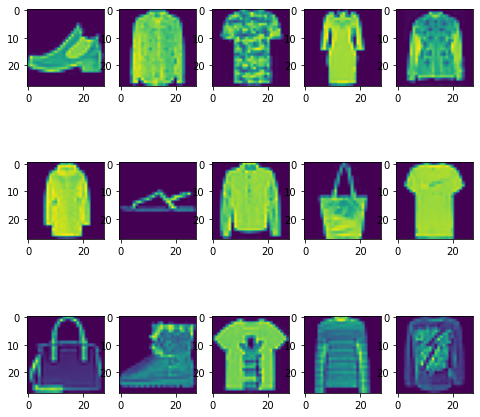

In [6]:
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 3
for i in range(1, columns*rows +1):
    img = X_tabel.values[i].reshape(28,28)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# creating a model before normalization and PCA to compare after

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf_before= KNeighborsClassifier(n_neighbors=5)

In [8]:
clf_before.fit(X,y)

KNeighborsClassifier()

# Inorder to applay PCA we shall first normalize the data.

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [10]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X)


PCA()

In [11]:
pca.explained_variance_ratio_[:10]

array([0.22057176, 0.14395563, 0.05458802, 0.05116399, 0.04069273,
       0.03012154, 0.02750481, 0.02325871, 0.01694438, 0.01309833])

In [12]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum[:10]

array([0.22057176, 0.36452739, 0.41911541, 0.4702794 , 0.51097213,
       0.54109367, 0.56859848, 0.5918572 , 0.60880158, 0.62189991])

In [13]:
d = np.argmax(cumsum >= 0.95) + 1
d   


256

# Below is a graph of Explained Variance as a function of the amount of PC's

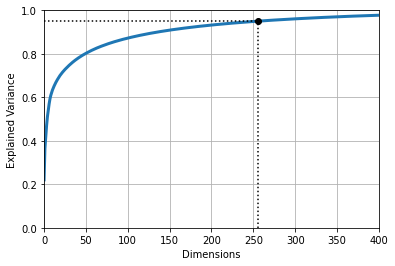

In [14]:

abc = plt.figure(figsize=(6,4))
abc = plt.plot(cumsum, linewidth=3)
#  Define axes limits
abc = plt.axis([0, 400, 0, 1])
#  Axes labels
abc = plt.xlabel("Dimensions")
abc = plt.ylabel("Explained Variance")
# Draw a (vertical) line from (d,0) to (d,0.95)
#       Should be black and dotted
abc = plt.plot([d, d], [0, 0.95], "k:")
#  Draw another dotted (horizontal) line 
#       from (0,0.95) to (d,0.95)
abc = plt.plot([0, d], [0.95, 0.95], "k:")
#  Draw a point at (d,0.95)
abc = plt.plot(d, 0.95, "ko")
# Annotate graph

#  Draw a grid
plt.grid(True)
plt.show()


# We will reduce our 784 features to 50 pc's

In [15]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
X_train_new=pca.fit_transform(X)


In [16]:
pca.explained_variance_ratio_

array([0.22057176, 0.14395563, 0.05458802, 0.05116399, 0.04069273,
       0.03012154, 0.02750481, 0.02325871, 0.01694438, 0.01309833,
       0.01161488, 0.00963108, 0.00890642, 0.00856623, 0.00743049,
       0.00730157, 0.00657498, 0.00632692, 0.00623657, 0.0058046 ,
       0.00515707, 0.00511548, 0.00472764, 0.00453556, 0.00438423,
       0.00416783, 0.00395055, 0.00393243, 0.00378352, 0.00374473,
       0.00368525, 0.00353642, 0.00336412, 0.00329991, 0.0032941 ,
       0.00319722, 0.00305992, 0.00293649, 0.00289162, 0.00280881,
       0.00271932, 0.00265915, 0.00255058, 0.00253454, 0.00244617,
       0.00241438, 0.00238458, 0.00227559, 0.00222599, 0.00213746])

# Below is a graph that explains variance explained vs pc's

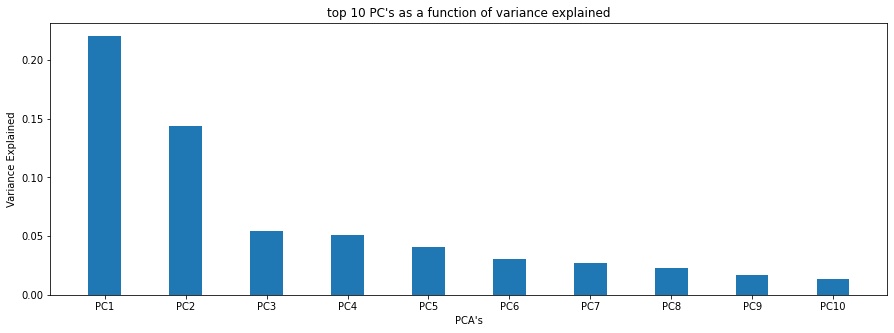

In [17]:
x_axis = pca.explained_variance_ratio_
x_ = x_axis.tolist()[:10]
lst = []
for i in range(1,11):
    lst.append('PC'+ str(i) )
fig = plt.figure(figsize = (15, 5))
plt.bar(lst, x_,width = 0.4 )
plt.xlabel("PCA's")
plt.ylabel("Variance Explained")
plt.title("top 10 PC's as a function of variance explained")
plt.show()

# Defining models that will train on our reduced dimentions data

In [18]:
clf_after= KNeighborsClassifier(n_neighbors=5)

In [19]:
from xgboost import XGBClassifier

xgboost_after = XGBClassifier()

In [20]:
clf_after.fit(X_train_new,y)

KNeighborsClassifier()

In [21]:
xgboost_after.fit(X_train_new,y)

c:\users\joshua student\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:09:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Importing and cleaning test data for modle accuracy score

In [22]:
df_test = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (3)\fashion-mnist_test.csv')

In [23]:
X_test=df_test.iloc[:,1:].values
y_test=df_test.iloc[:,0].values
import matplotlib.pyplot as plt
a=X[0].reshape(28,28)

# model before PCA results:

In [25]:
clf_before.score(X_test,y_test)

0.8589

# Transforming testing data

In [26]:
X_test = sc.fit_transform(X_test)

In [27]:
X_test_new=pca.transform(X_test)

In [28]:
pca.explained_variance_ratio_

array([0.22057176, 0.14395563, 0.05458802, 0.05116399, 0.04069273,
       0.03012154, 0.02750481, 0.02325871, 0.01694438, 0.01309833,
       0.01161488, 0.00963108, 0.00890642, 0.00856623, 0.00743049,
       0.00730157, 0.00657498, 0.00632692, 0.00623657, 0.0058046 ,
       0.00515707, 0.00511548, 0.00472764, 0.00453556, 0.00438423,
       0.00416783, 0.00395055, 0.00393243, 0.00378352, 0.00374473,
       0.00368525, 0.00353642, 0.00336412, 0.00329991, 0.0032941 ,
       0.00319722, 0.00305992, 0.00293649, 0.00289162, 0.00280881,
       0.00271932, 0.00265915, 0.00255058, 0.00253454, 0.00244617,
       0.00241438, 0.00238458, 0.00227559, 0.00222599, 0.00213746])

# accuracy score of models trained on reduced training data:

In [29]:
clf_after.score(X_test_new,y_test)

0.859

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits = 5, shuffle = True)
scores = cross_val_score(clf_after, X_train_new, y, scoring='accuracy', cv=folds)
scores.mean()

0.8546666666666667

In [31]:
xgboost_after.score(X_test_new,y_test)

0.873

In [34]:
folds = KFold(n_splits = 5, shuffle = True)
scores = cross_val_score(xgboost_after, X_train_new, y, scoring='accuracy', cv=folds)
scores.mean()

c:\users\joshua student\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:24:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\joshua student\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\joshua student\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:38:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\joshua student\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:45:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\joshua student\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8704333333333334

# comparing our models to a dummy classifier

In [32]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')

dummy_clf.score(X, y)

0.1

# conclusions:

## our knn model before normalization and PCA accuracy: 85.89%

## our knn model after PCA to 50 dimentions accuracy with kfold validation: 85.46%

## our xgboost model after PCA to 50 dimentions accuracy with kfold validation: 87.04%

## This means we get nearly as good as results by using 50 dimentions instead of 784!

### we also out performed a dummy model wich shows our model is worth somthing